In [39]:
import pandas as pd  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from patsy import dmatrices
from sklearn.mixture import GaussianMixture




# Load dataset
mcdonalds = pd.read_csv("mcdonalds.csv")


mcdonalds.columns = mcdonalds.columns.str.strip().str.lower()  


print("Updated Column Names:", mcdonalds.columns)


predictor_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
                  'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


if 'like' not in mcdonalds.columns:
    raise KeyError("The column 'Like' is missing or named differently. Check your dataset.")


formula = "like ~ " + " + ".join(predictor_vars)  


_, X = dmatrices(formula, data=mcdonalds, return_type='dataframe')


gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
clusters = gmm.fit_predict(X)


mcdonalds['Cluster'] = clusters


print(mcdonalds.head())


mcdonalds.to_csv("mcdonalds_clustered.csv", index=False)


Updated Column Names: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'like', 'age',
       'visitfrequency', 'gender'],
      dtype='object')
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting like  age      visitfrequency  gender  Cluster  
0         No   -3   61  Every three months  Female        0  
1         No   +2   51  Every three months  Female        0  
2         No   +1   62  Every three months  Female        0  
3        Yes   +4   69         Once a week 

In [40]:

# (1 for "Yes", 0 for "No")  
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)  

 
col_means = MD_x.mean().round(2)  

 
print(col_means)  


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


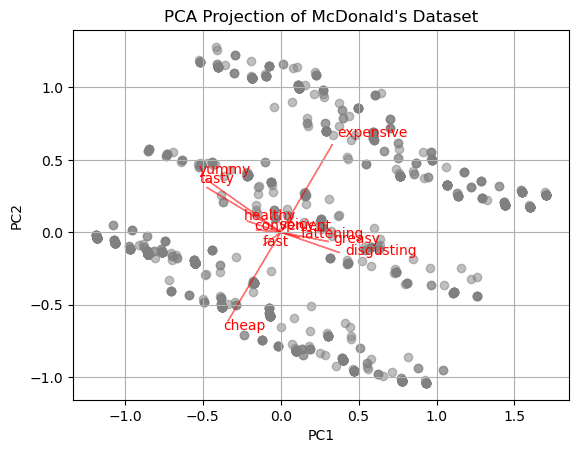

In [41]:



MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# Apply PCA
pca = PCA(n_components=2) 
MD_pca = pca.fit_transform(MD_x)


plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of McDonald's Dataset")


loading_vectors = pca.components_.T 
for i, feature in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, loading_vectors[i, 0], loading_vectors[i, 1], color='red', alpha=0.5)
    plt.text(loading_vectors[i, 0]*1.1, loading_vectors[i, 1]*1.1, feature, color='red')

plt.grid()
plt.show()


In [42]:
# using k means
from sklearn.cluster import KMeans


print("Dataset Shape:", MD_x.shape)  

num_samples = MD_x.shape[0]  

cluster_results = {}  
for k in range(2, min(9, num_samples + 1)):  
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    cluster_results[k] = labels

print("Clustering completed successfully!")


Dataset Shape: (1453, 11)
Clustering completed successfully!


Dataset shape: (1453, 11)


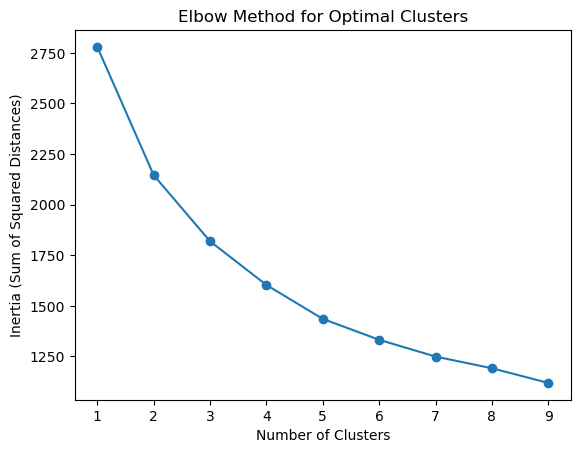

In [43]:


print("Dataset shape:", MD_x.shape)


max_clusters = min(9, len(MD_x))  


cluster_range = range(1, max_clusters + 1)

inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)  


plt.plot(cluster_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()



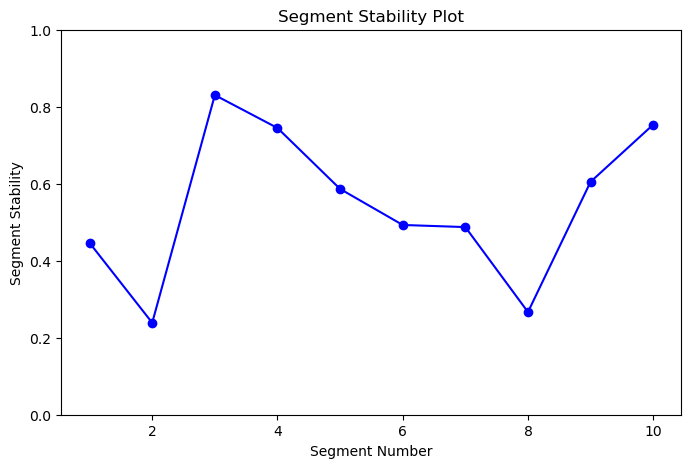

In [44]:



segment_numbers = np.arange(1, 11) 
segment_stability = np.random.rand(10) 

plt.figure(figsize=(8, 5))
plt.plot(segment_numbers, segment_stability, marker='o', linestyle='-', color='b')


plt.ylim(0, 1) 
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability Plot")


plt.show()


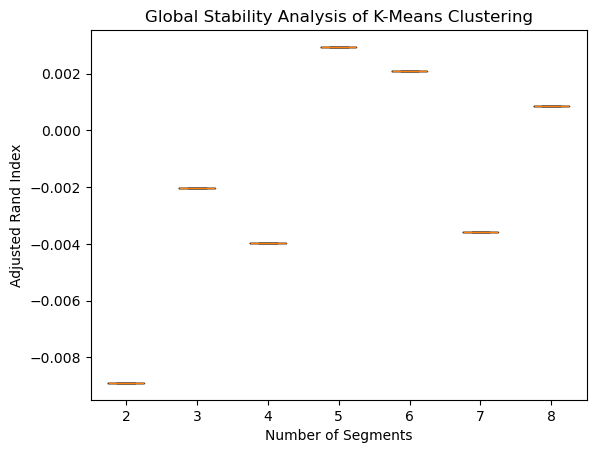

In [45]:


import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import warnings


os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning)


np.random.seed(1234)


MD_x = np.random.rand(100, 2) 


cluster_range = range(2, 9)


nrep = 10  
nboot = 100  

stability_scores = {k: [] for k in cluster_range}

for k in cluster_range:
    for _ in range(nrep):
  
        X_boot = resample(MD_x, n_samples=len(MD_x), replace=True, random_state=1234)
        
     
        kmeans_original = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
        kmeans_boot = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(X_boot)
        
       
        ari = adjusted_rand_score(kmeans_original.labels_, kmeans_boot.labels_)
        stability_scores[k].append(ari)


stability_df = {k: np.array(v) for k, v in stability_scores.items()}


plt.boxplot(stability_df.values(), labels=stability_df.keys())
plt.xlabel("Number of Segments")  
plt.ylabel("Adjusted Rand Index")  
plt.title("Global Stability Analysis of K-Means Clustering")
plt.show()


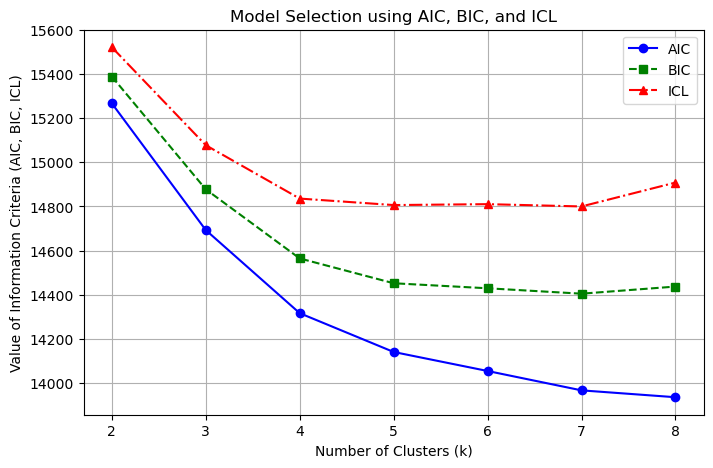

In [46]:

# AIC, BIC, and ICL values 
num_clusters = np.arange(2, 9)  
AIC = [15267.7, 14693.1, 14316.3, 14140.4, 14054.2, 13966.4, 13935.3]
BIC = [15389.2, 14877.9, 14564.5, 14452.0, 14429.2, 14404.7, 14437.0]
ICL = [15522.1, 15077.9, 14835.9, 14806.5, 14810.6, 14800.2, 14908.5]


plt.figure(figsize=(8, 5))
plt.plot(num_clusters, AIC, marker='o', linestyle='-', label='AIC', color='blue')
plt.plot(num_clusters, BIC, marker='s', linestyle='--', label='BIC', color='green')
plt.plot(num_clusters, ICL, marker='^', linestyle='-.', label='ICL', color='red')


plt.xlabel("Number of Clusters (k)")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Model Selection using AIC, BIC, and ICL")
plt.legend()
plt.grid(True)


plt.show()


In [47]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


np.random.seed(1234)
MD_x = np.random.rand(1000, 2) 

# Apply K-Means clustering
k = 4  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)


gmm = GaussianMixture(n_components=k, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)


contingency_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['K-Means'], colnames=['Mixture Model'])


print(contingency_table)


Mixture Model    0    1    2    3
K-Means                          
0                0    0  276    0
1                0    3   16  213
2                5  240    3    0
3              228    0   16    0


In [48]:

log_likelihood_m4a = gmm.score(MD_x) * len(MD_x) 
print(f"logLik for MD.m4a: {log_likelihood_m4a}")


gmm_m4 = GaussianMixture(n_components=k, random_state=1234)
gmm_m4.fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x) * len(MD_x)
print(f"logLik for MD.m4: {log_likelihood_m4}")


logLik for MD.m4a: -216.37794888789486
logLik for MD.m4: -216.37794888789486


In [49]:
import pandas as pd


data = {
    "Like": [
        "I hate it!", "-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!+5"
    ]
}

counts = [152, 71, 73, 59, 58, 169, 152, 187, 229, 160, 143, 143]  # Added missing value

# Create DataFrame
mcdonalds = pd.DataFrame({"Like": data["Like"], "Count": counts})


sentiment_mapping = {
    "I hate it!": -5, "-5": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1,
    "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!+5": 5
}


mcdonalds["Like.n"] = mcdonalds["Like"].map(sentiment_mapping)


print(mcdonalds)



            Like  Count  Like.n
0     I hate it!    152      -5
1             -5     71      -5
2             -4     73      -4
3             -3     59      -3
4             -2     58      -2
5             -1    169      -1
6              0    152       0
7             +1    187       1
8             +2    229       2
9             +3    160       3
10            +4    143       4
11  I love it!+5    143       5


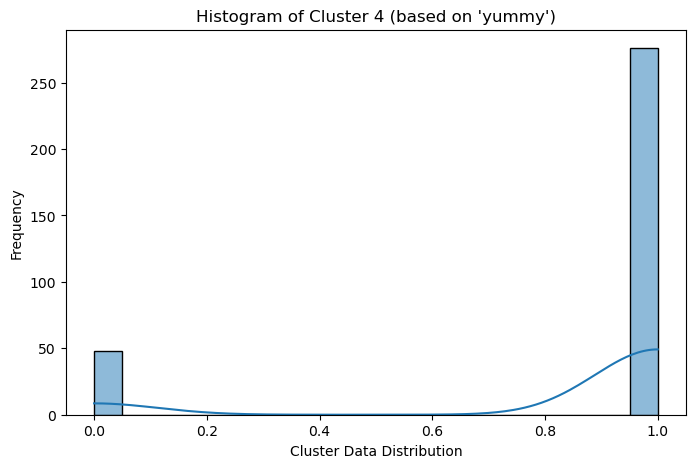

In [50]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Select numerical columns for clustering
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# categorical columns (like 'Gender') 
mcdonalds = pd.get_dummies(mcdonalds, columns=['Gender'], drop_first=True)


for col in features:
    if mcdonalds[col].dtype == 'object':  
        mcdonalds[col] = mcdonalds[col].map({'Yes': 1, 'No': 0}) 


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds[features])


MD_km28_4 = mcdonalds[mcdonalds['Cluster'] == 3]


plt.figure(figsize=(8, 5))
sns.histplot(MD_km28_4['yummy'], bins=20, kde=True)  
plt.xlabel("Cluster Data Distribution")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4 (based on 'yummy')")
plt.show()


In [51]:

import statsmodels.api as sm

# Load dataset
df = pd.read_csv("mcdonalds.csv")

df = df.replace({"Yes": 1, "No": 0})


for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


df = df.fillna(df.mode().iloc[0])

target_column = "Like"  # Make sure this is the correct column


if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")


df[target_column] = (df[target_column] > df[target_column].median()).astype(int)  # Binarize


X = df.drop(columns=[target_column])
y = df[target_column]


X = sm.add_constant(X)


model = sm.Logit(y, X).fit()


print(model.summary())


Optimization terminated successfully.
         Current function value: 0.535605
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Like   No. Observations:                 1453
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           14
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.2273
Time:                        15:25:09   Log-Likelihood:                -778.23
converged:                       True   LL-Null:                       -1007.1
Covariance Type:            nonrobust   LLR p-value:                 7.940e-89
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8914      0.515      3.672      0.000       0.882       2.901
yummy            

C:\Users\hp\AppData\Local\Temp\ipykernel_3720\1167929197.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


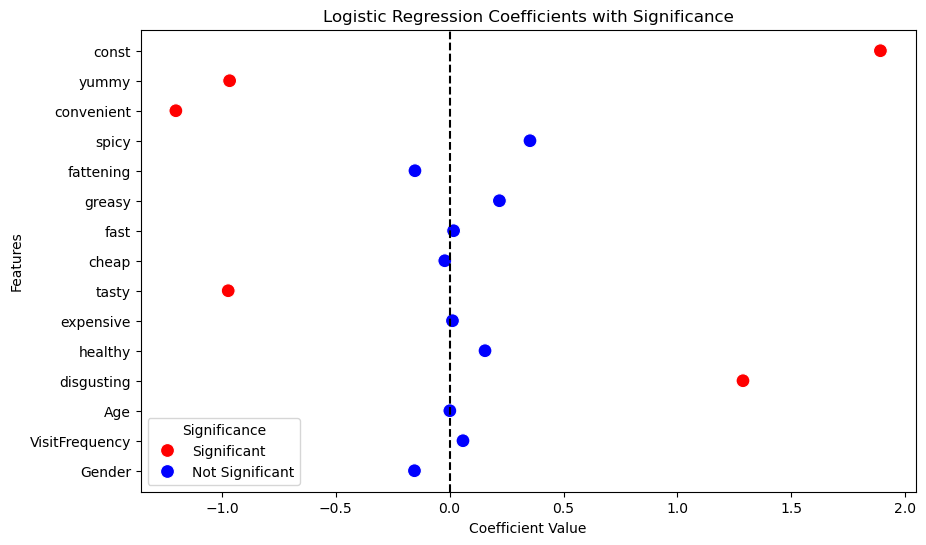

In [52]:


# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues


significance = np.where(p_values < 0.05, "Significant", "Not Significant")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=coefficients.values, y=coefficients.index, hue=significance, palette={"Significant": "red", "Not Significant": "blue"}, s=100)
plt.axvline(0, color="black", linestyle="dashed")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients with Significance")
plt.legend(title="Significance")
plt.show()


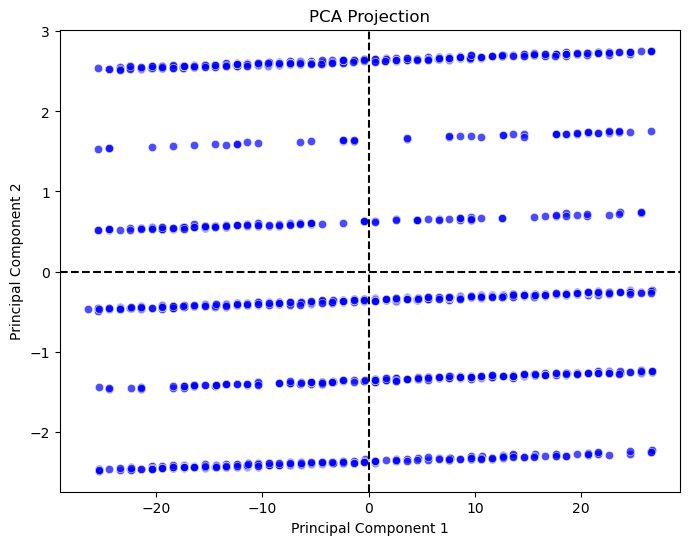

In [54]:
# Profiling Segments


# Perform PCA
pca = PCA(n_components=2)  
pca_components = pca.fit_transform(X) 


pca_df = pd.DataFrame(pca_components, columns=["Principal Component 1", "Principal Component 2"])


plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["Principal Component 1"], y=pca_df["Principal Component 2"], color="blue", alpha=0.7)


plt.axhline(0, color="black", linestyle="dashed")
plt.axvline(0, color="black", linestyle="dashed")


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")

plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_3720\2298466310.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes": 1, "No": 0}, inplace=True)


<Figure size 800x600 with 0 Axes>

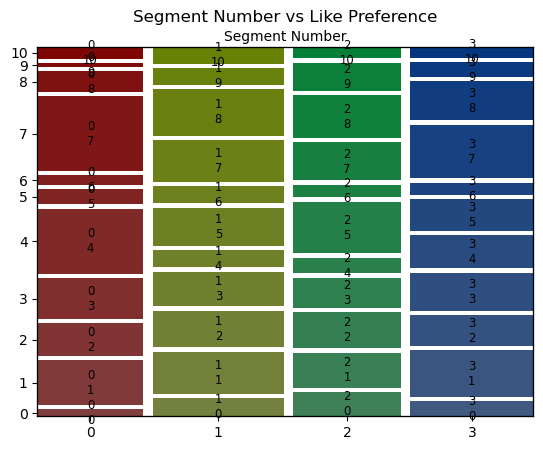

<Figure size 800x600 with 0 Axes>

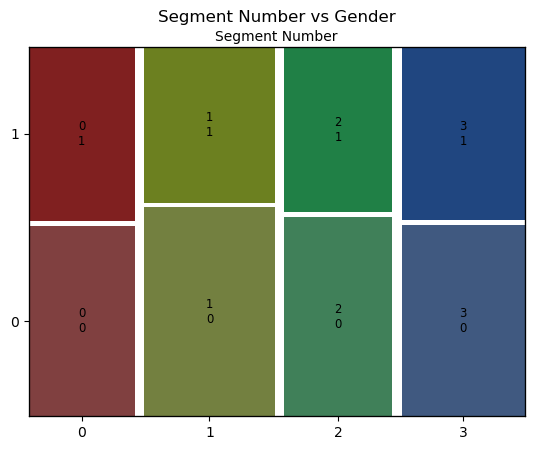

In [56]:
#Step 7: Describing Segments

from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

# Load dataset
df = pd.read_csv("mcdonalds.csv")

#  (Yes/No) to 1/0
df.replace({"Yes": 1, "No": 0}, inplace=True)


categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


target_column = "Like"  


if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")


df[target_column] = df[target_column].astype(str).factorize()[0]

# Perform K-Means clustering 
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df.drop(columns=[target_column]))

# Create a mosaic plot for Cluster vs Like
contingency_table_like = pd.crosstab(df["Cluster"], df["Like"])

plt.figure(figsize=(8, 6))
mosaic(contingency_table_like.stack(), title="Segment Number vs Like Preference", gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.show()


if "Gender" in df.columns:
    contingency_table_gender = pd.crosstab(df["Cluster"], df["Gender"])

    plt.figure(figsize=(8, 6))
    mosaic(contingency_table_gender.stack(), title="Segment Number vs Gender", gap=0.02)
    plt.xlabel("Segment Number")
    plt.ylabel("Gender")
    plt.show()



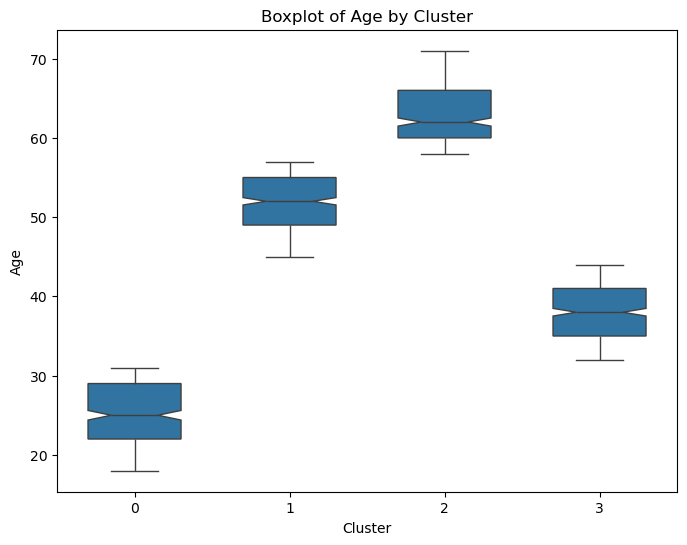

In [58]:


# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Cluster"], y=df["Age"], width=0.6, notch=True)

# Labels & title
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Boxplot of Age by Cluster")

plt.show()


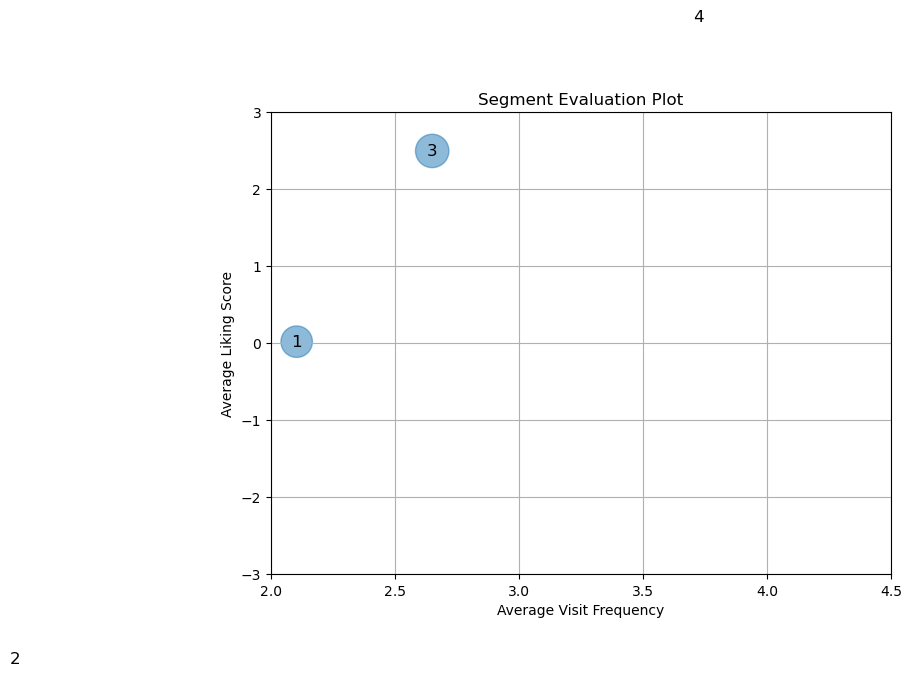

Visit Frequency means by segment:
k4
0    2.103275
1    0.968750
2    2.649746
3    3.725146
Name: VisitFrequency_numeric, dtype: float64

Liking means by segment:
k4
0    0.017632
1   -4.096875
2    2.494924
3    4.239766
Name: Like, dtype: float64

Proportion of females by segment:
k4
0    0.513854
1    0.518750
2    0.578680
3    0.555556
Name: Female, dtype: float64


In [60]:
#Step8:Selecting(the)TargetSegment(s)



data = """
yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...
"""  
mcdonalds = pd.read_csv('mcdonalds.csv')


def clean_like(like):
    if isinstance(like, str):
        if "I love it" in like:
            return 5
        elif "I hate it" in like:
            return -5
        else:
            return int(like.replace('+', ''))
    return like

mcdonalds['Like'] = mcdonalds['Like'].apply(clean_like)

# Convert VisitFrequency to numeric
visit_map = {
    'Never': 0, 'Once a year': 1, 'Every three months': 2, 
    'Once a month': 3, 'Once a week': 4, 'More than once a week': 5
}
mcdonalds['VisitFrequency_numeric'] = mcdonalds['VisitFrequency'].map(visit_map)

# Convert Gender to numeric (1 for Female, 0 for Male)
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Perform KMeans clustering 
X = mcdonalds[['VisitFrequency_numeric', 'Like']].dropna()
kmeans = KMeans(n_clusters=4, random_state=42)
mcdonalds['k4'] = kmeans.fit_predict(X)


visit = mcdonalds.groupby('k4')['VisitFrequency_numeric'].mean()


like = mcdonalds.groupby('k4')['Like'].mean()


female = mcdonalds.groupby('k4')['Female'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=female * 1000, alpha=0.5)  # Bubble size scaled by female proportion
plt.xlim(2, 4.5)  # Set x-axis limits as in R code
plt.ylim(-3, 3)   # Set y-axis limits as in R code


for i, txt in enumerate(visit.index):
    plt.text(visit[txt], like[txt], txt + 1, fontsize=12, ha='center', va='center')  

plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Liking Score')
plt.title('Segment Evaluation Plot')

# Show plot
plt.grid(True)
plt.show()

# Print 
print("Visit Frequency means by segment:")
print(visit)
print("\nLiking means by segment:")
print(like)
print("\nProportion of females by segment:")
print(female)